# Análise de Avaliações de Cervejas

## Descrição do Projeto
Este projeto explora uma base de dados com mais de 1,5 milhão de avaliações de cervejas feitas por usuários. As avaliações abordam diversos aspectos sensoriais, como aroma, aparência, sabor e sensação, além de informações detalhadas sobre as cervejarias e os estilos de cerveja. A base é ideal para análises de tendências de consumo, preferências de estilos e insights sobre o comportamento dos consumidores de cervejas.

## Objetivos
- **Analisar a qualidade das cervejas** com base em diferentes critérios sensoriais.
- **Identificar tendências** no consumo de cervejas.
- **Construir um modelo preditivo** para estimar a nota geral da cerveja (`review_overall`) com base nas avaliações sensoriais.

## Estrutura dos Dados
A base de dados contém as seguintes variáveis:

| Variável                  | Descrição                                         |
|---------------------------|---------------------------------------------------|
| **brewery_id**            | Identificador único da cervejaria.                |
| **brewery_name**          | Nome da cervejaria.                              |
| **review_time**           | Data e hora da avaliação.                        |
| **review_overall**        | Nota geral da cerveja (escala de 1 a 5).        |
| **review_aroma**          | Avaliação do aroma (escala de 1 a 5).           |
| **review_appearance**     | Avaliação da aparência (escala de 1 a 5).       |
| **review_profilename**    | Nome de usuário do avaliador.                    |
| **beer_style**            | Estilo ou tipo de cerveja.                       |
| **review_palate**         | Avaliação da sensação na boca (escala de 1 a 5).|
| **review_taste**          | Avaliação do sabor (escala de 1 a 5).           |
| **beer_name**             | Nome da cerveja.                                 |
| **beer_abv**              | Teor alcoólico da cerveja (ABV - Alcohol by Volume). |
| **beer_beerid**           | Identificador único da cerveja.                  |

Com essa estrutura, é possível realizar uma análise detalhada da relação entre os diferentes aspectos sensoriais e as notas atribuídas pelos consumidores, proporcionando insights valiosos sobre a indústria cervejeira.

## Metodologia
1. **Importação de Bibliotecas**: Utilizamos bibliotecas como `pandas`, `numpy`, `sklearn` e `matplotlib` para manipulação de dados, modelagem e visualização.
2. **Carregamento dos Dados**: Os dados foram carregados de um arquivo CSV e armazenados em um DataFrame.
3. **Preparação dos Dados**:
   - Seleção de características e variável alvo (`review_overall`).
   - Conversão da coluna `review_time` para o formato datetime (opcional).
   - Classificação de avaliações em categorias textuais:
     - Os valores de 1 a 5 foram interpretados da seguinte forma:
       - `1.0`: "Muito ruim"
       - `1.5`: "Ruim"
       - `2.0`: "Regular"
       - `2.5`: "Razoável"
       - `3.0`: "Satisfatório"
       - `3.5`: "Agradável"
       - `4.0`: "Muito bom"
       - `4.5`: "Excelente"
       - `5.0`: "Perfeito"
4. **Amostragem dos Dados**: Apenas 10% do total de dados foram utilizados para análise, para garantir uma amostra representativa, mantendo o desempenho computacional.
5. **Divisão dos Dados**: O conjunto de dados foi dividido em conjuntos de treino e teste (80/20).
6. **Criação e Treinamento do Modelo**: Um modelo de regressão linear foi criado e treinado para prever a nota geral da cerveja.
7. **Avaliação do Modelo**: O modelo foi avaliado utilizando as métricas de erro quadrático médio (MSE) e o coeficiente de determinação (R²).
8. **Previsões**: Foi criada uma função para prever a nota geral com base em entradas sensoriais.
9. **Visualização dos Resultados**: Um gráfico de dispersão foi gerado para comparar os valores reais e previstos.

## Resultados
O modelo conseguiu prever a nota geral com uma precisão razoável, proporcionando insights sobre a relação entre as características sensoriais e a avaliação geral da cerveja.

## Conclusão
Este projeto oferece uma visão abrangente sobre as avaliações de cervejas, permitindo que tanto os consumidores quanto os produtores entendam melhor as preferências e tendências no mercado.

## Métricas Utilizadas
- **MSE (Erro Quadrático Médio)**: Mede o quão distantes as previsões estão dos valores reais. Quanto menor, melhor a precisão do modelo.
- **R² (Coeficiente de Determinação)**: Indica o quanto o modelo explica a variabilidade dos dados, variando de 0 a 1, onde valores mais próximos de 1 indicam melhor desempenho.
- **Acurácia**: Embora mais comum em classificações, mede a proporção de previsões corretas. Não é usada diretamente em regressão, mas importante em outros tipos de modelos.

## Autor
[**Fernando Nonato**](https://github.com/Cyberfn)  
<a href="https://github.com/Cyberfn"><img src="https://github.com/Cyberfn.png" width="150" height="150" /></a>


# 1 - Importando Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import layers, models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 2 - Carregando os Dados

In [2]:
df = pd.read_csv('../input/beerreviews/beer_reviews.csv')
df2 = df.sample(frac=0.1, random_state=42)

# 3 - Visualização de Dados das Avaliações de Cervejas

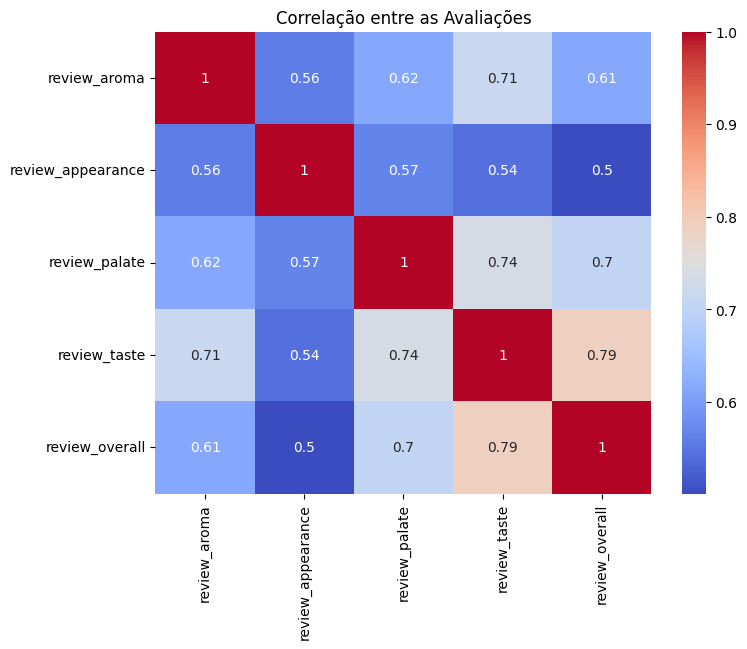

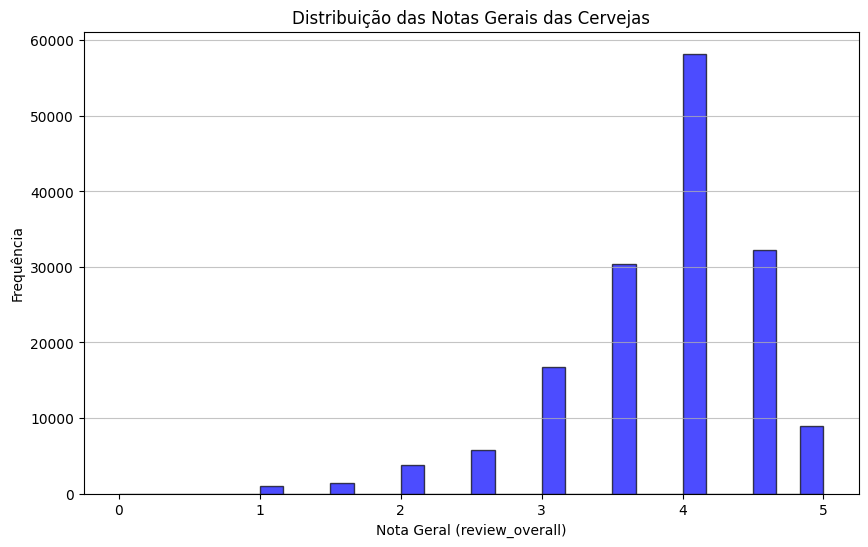

In [3]:
# Heatmap - Correlação entre as avaliações
corr = df2[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre as Avaliações')
plt.show()

# Criando Histograma das Avaliações
plt.figure(figsize=(10, 6))
plt.hist(df2['review_overall'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribuição das Notas Gerais das Cervejas')
plt.xlabel('Nota Geral (review_overall)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()


# 4 - Selecionando Características e Alvo

In [4]:
features = df2[['review_taste']]
target = df2['review_overall']

# 5 - Convertendo para datetime

In [5]:
df2['review_time'] = pd.to_datetime(df2['review_time'], unit='s')

# 6 - Dividindo os Dados

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Treinando modelo em binário
target_binary = (target > 3.0).astype(int)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(features, target_binary, test_size=0.2, random_state=42)

# 7 - Modelos de Aprendizagem de Máquina Supervisionado

## 7.1 - Regressão Linear
A Regressão Linear é um método de aprendizado supervisionado utilizado para prever valores contínuos. Ele estabelece uma relação linear entre as variáveis independentes (features) e a variável dependente (target). No nosso caso, a regressão linear tenta prever a nota geral da cerveja (review_overall) com base nas características sensoriais (review_taste).

Regressão Linear - MSE: 0.20, R²: 0.62, Acurácia: 0.79 



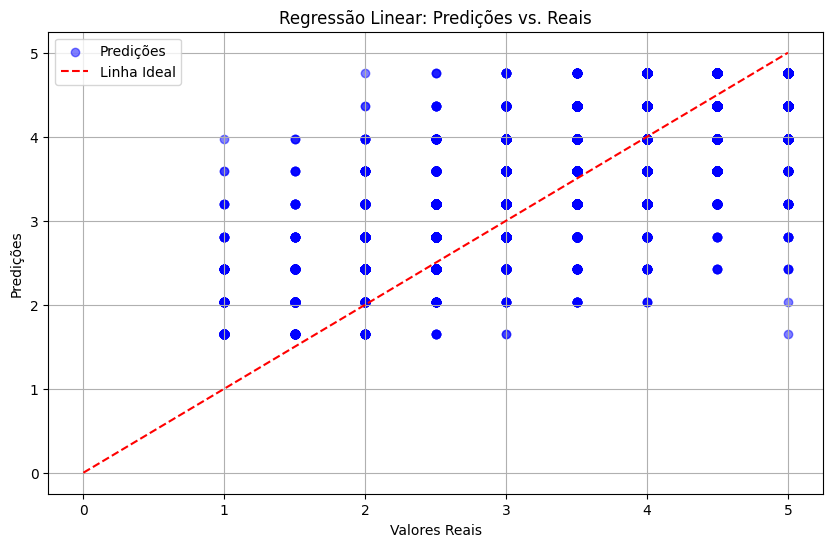

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Avaliando desempenho
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
linear_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(linear_predictions).astype(int))

print(f'Regressão Linear - MSE: {linear_mse:.2f}, R²: {linear_r2:.2f}, Acurácia: {linear_accuracy:.2f} \n')

# Gráfico para Regressão Linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('Regressão Linear: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.2 - Regressão Logística
A Regressão Logística é usada para problemas de classificação binária. Neste exemplo, estamos prevendo se a nota geral da cerveja é maior que 3, ou seja, transformamos a variável alvo (review_overall) em 0 ou 1, onde 1 indica uma nota positiva (> 3) e 0 uma nota negativa (≤ 3). A regressão logística calcula a probabilidade de um evento pertencente a uma classe específica.

Regressão Logística - MSE: 0.10, R²: 0.34, Acurácia: 0.90



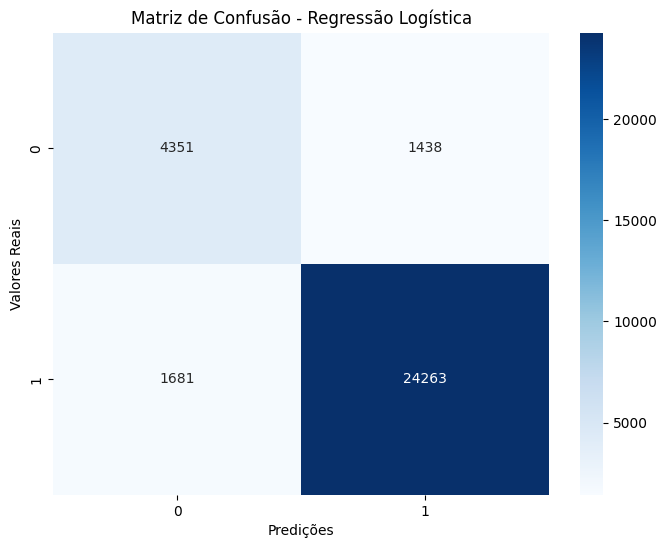

In [9]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_logistic, y_train_logistic)
logistic_predictions = logistic_model.predict(X_test_logistic)

# Avaliando desempenho
logistic_mse = mean_squared_error(y_test_logistic, logistic_predictions)
logistic_r2 = r2_score(y_test_logistic, logistic_predictions)
logistic_accuracy = accuracy_score(y_test_logistic, logistic_predictions)

print(f'Regressão Logística - MSE: {logistic_mse:.2f}, R²: {logistic_r2:.2f}, Acurácia: {logistic_accuracy:.2f}\n')

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_logistic, logistic_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.show()

## 7.3 - Decision Tree
O Decision Tree Regressor cria uma árvore de decisão para prever valores contínuos. Ele divide o conjunto de dados em subconjuntos com base nas características que melhor explicam a variável alvo, construindo uma árvore com nós que representam as decisões.

Decision Tree Regressor - MSE: 0.19, R²: 0.63, Acurácia: 0.80



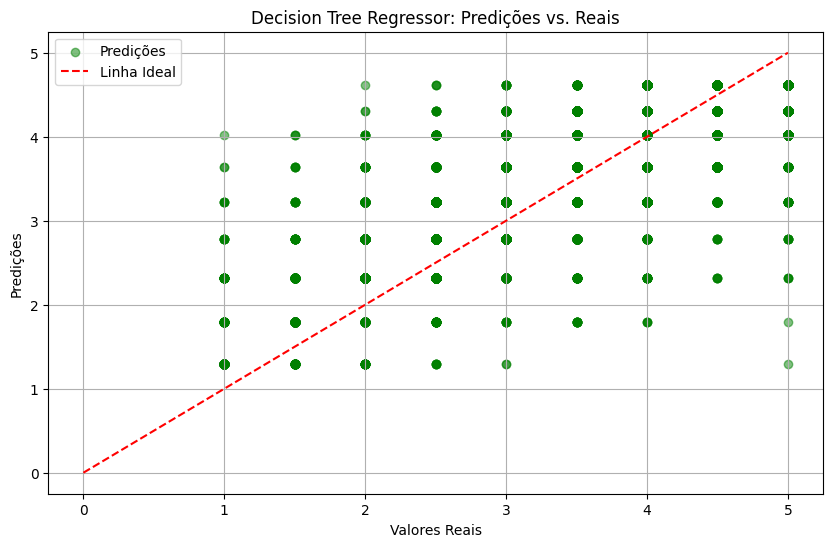

In [10]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Avaliando desempenho
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
decision_tree_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(decision_tree_predictions).astype(int))

print(f"Decision Tree Regressor - MSE: {decision_tree_mse:.2f}, R²: {decision_tree_r2:.2f}, Acurácia: {decision_tree_accuracy:.2f}\n")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, decision_tree_predictions, color='green', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('Decision Tree Regressor: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.3.2 - Decision Tree Classifier
O Decision Tree Classifier é um modelo de árvore de decisão para problemas de classificação. Ele divide os dados em nós que representam decisões binárias para prever classes (neste caso, a classificação binária da nota geral).

In [11]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_logistic, y_train_logistic)

# Fazendo previsões
decision_tree_predictions = decision_tree_classifier.predict(X_test_logistic)

# Avaliando o desempenho
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
decision_tree_accuracy = accuracy_score(y_test_logistic, decision_tree_predictions)


print(f"Decision Tree Classifier - MSE: {decision_tree_mse:.2f}, R²: {decision_tree_r2:.2f}, Acurácia: {decision_tree_accuracy:.2f}\n")

Decision Tree Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90



## 7.4 - Random Forest
O Random Forest é uma técnica que combina múltiplas árvores de decisão (tanto regressão quanto classificação). Ele gera várias árvores de decisão e as combina para melhorar a precisão e reduzir o risco de overfitting. No caso de regressão, a média das previsões de todas as árvores é considerada a previsão final; para classificação, a classe mais votada é a previsão.

Random Forest Regressor - MSE: 0.19, R²: 0.63, Acurácia: 0.80 



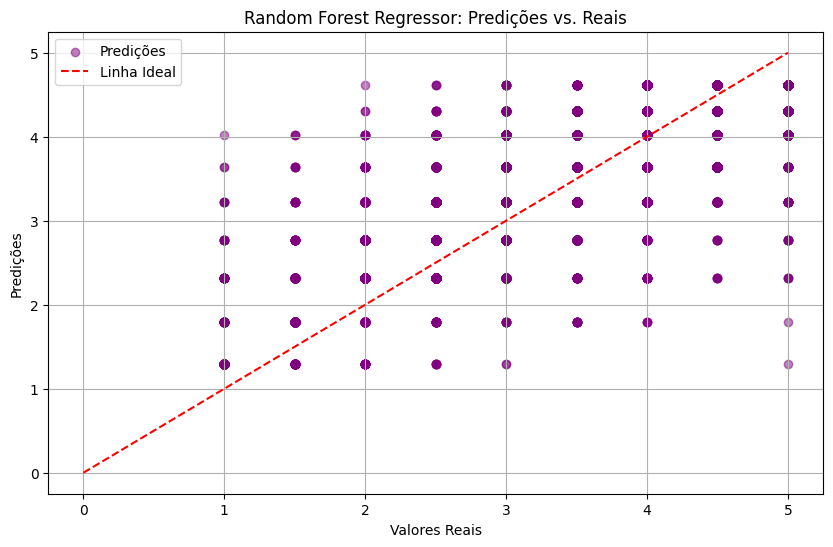

In [12]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

# Avaliando desempenho
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
random_forest_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(random_forest_predictions).astype(int))

print(f'Random Forest Regressor - MSE: {random_forest_mse:.2f}, R²: {random_forest_r2:.2f}, Acurácia: {random_forest_accuracy:.2f} \n')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_predictions, color='purple', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('Random Forest Regressor: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.4.2 - Random Forest Classifier
O Random Forest Classifier é um modelo de aprendizado supervisionado que utiliza uma combinação de várias árvores de decisão para problemas de classificação. Cada árvore é treinada em uma amostra aleatória dos dados, e a classificação final é determinada pelo voto da maioria das árvores. Isso ajuda a melhorar a precisão e reduzir o risco de overfitting, pois a média de várias árvores tende a generalizar melhor do que uma única árvore de decisão.

In [13]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_logistic, y_train_logistic)
random_forest_classifier_predictions = random_forest_classifier.predict(X_test_logistic)

random_forest_classifier_mse = mean_squared_error(y_test, random_forest_classifier_predictions)
random_forest_classifier_r2 = r2_score(y_test, random_forest_classifier_predictions)
random_forest_classifier_accuracy = accuracy_score(y_test_logistic, random_forest_classifier_predictions)

print(f'Random Forest Classifier - MSE: {random_forest_classifier_mse:.2f}, R²: {random_forest_classifier_r2:.2f}, Acurácia: {random_forest_classifier_accuracy:.2f} \n')

Random Forest Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90 



## 7.5 - K-Nearest Neighbors (KNN) Regressor

O K-Nearest Neighbors Regressor (KNN Regressor) é uma extensão do algoritmo KNN para problemas de regressão. Em vez de classificar os dados, ele prevê valores contínuos com base nos k vizinhos mais próximos. O valor previsto é geralmente a média dos valores-alvo dos k pontos de dados mais próximos. O KNN Regressor é simples e pode ser muito eficaz em certos problemas, mas pode sofrer com a dimensionalidade e com o tempo de computação em grandes conjuntos de dados.

KNN - MSE: 0.23, R²: 0.56, Acurácia: 0.80 



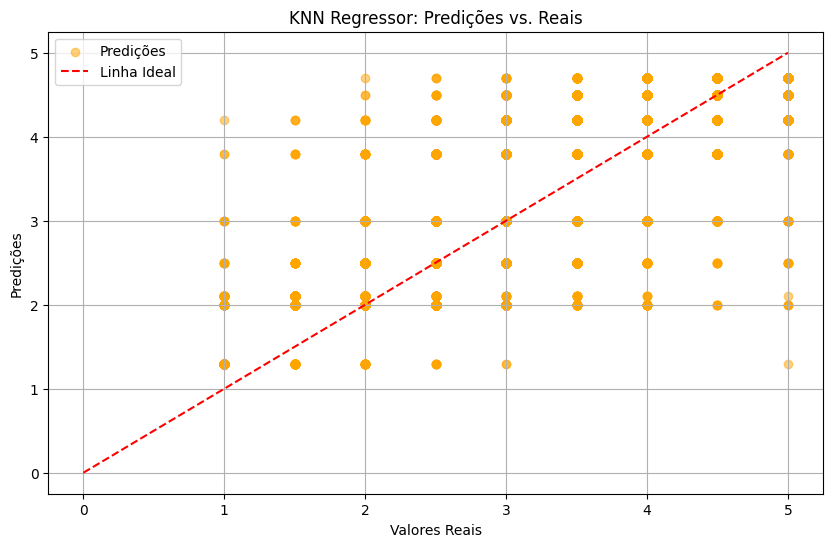

In [14]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Avaliando desempenho
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
knn_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(knn_predictions).astype(int))

print(f'KNN - MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, Acurácia: {knn_accuracy:.2f} \n')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='orange', alpha=0.5, label='Predições')
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Linha Ideal')
plt.title('KNN Regressor: Predições vs. Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.legend()
plt.grid()
plt.show()

## 7.5.2 - K-Nearest Neighbors (KNN) Classifier
O K-Nearest Neighbors (KNN) é um método de classificação simples e intuitivo, onde as previsões são feitas com base nas k amostras mais próximas do ponto de dados alvo. Para problemas de classificação, ele atribui a classe mais comum entre os vizinhos mais próximos. É uma abordagem baseada em distâncias, o que significa que a distância entre os pontos é essencial para determinar a classe.

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_logistic, y_train_logistic)
knn_classifier_predictions = knn_classifier.predict(X_test_logistic)

knn_classifier_mse = mean_squared_error(y_test, knn_classifier_predictions)
knn_classifier_r2 = r2_score(y_test, knn_classifier_predictions)
knn_classifier_accuracy = accuracy_score(y_test_logistic, knn_classifier_predictions)

print(f'KNN Classifier - MSE: {knn_classifier_mse:.2f}, R²: {knn_classifier_r2:.2f}, Acurácia: {knn_classifier_accuracy:.2f} \n')

KNN Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90 



## 7.6 - Support Vector Classifier (SVC)
O Support Vector Classifier (SVC) é um modelo supervisionado que tenta encontrar um hiperplano em um espaço multidimensional que separa as classes da melhor forma possível. Ele maximiza a margem entre os pontos de dados mais próximos de ambas as classes (os "vetores de suporte"). O SVC é poderoso em dados com alta dimensionalidade, mas pode não funcionar bem em dados com muitas sobreposições de classe.

In [16]:
svc_model = SVC()
svc_model.fit(X_train_logistic, y_train_logistic)
svc_predictions = svc_model.predict(X_test_logistic)

svc_mse = mean_squared_error(y_test, svc_predictions)
svc_r2 = r2_score(y_test, svc_predictions)
svc_accuracy = accuracy_score(y_test_logistic, svc_predictions)

print(f'Support Vector Classifier - MSE: {svc_mse:.2f}, R²: {svc_r2:.2f}, Acurácia: {svc_accuracy:.2f} \n')

Support Vector Classifier - MSE: 9.33, R²: -16.89, Acurácia: 0.90 



# 8 - Modelos de Aprendizagem de Máquina Não Supervisionada

## 8.1 - K-Means
O K-Means é um algoritmo de aprendizado não supervisionado que tenta dividir os dados em k clusters (agrupamentos) com base nas características dos dados. O algoritmo tenta minimizar a variabilidade dentro dos clusters, atribuindo cada ponto de dados ao centroide mais próximo. Ao contrário dos outros modelos, o K-Means não usa rótulos para prever classes, mas sim agrupa dados com características similares.

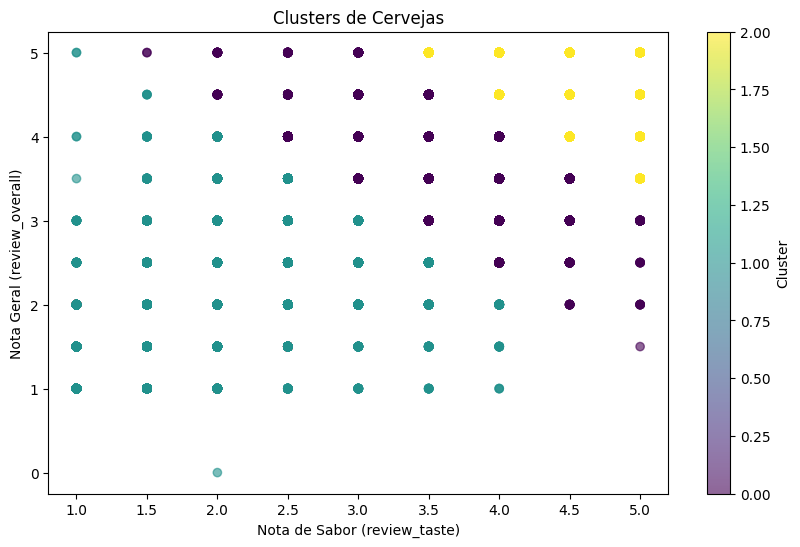

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df2['cluster'] = kmeans.fit_predict(df2[['review_taste', 'review_overall']])

# Visualizando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df2['review_taste'], df2['review_overall'], c=df2['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters de Cervejas')
plt.xlabel('Nota de Sabor (review_taste)')
plt.ylabel('Nota Geral (review_overall)')
plt.colorbar(label='Cluster')
plt.show()

## 8.2 - Rede Neural
Uma Rede Neural Artificial (RNA), como o Perceptron Multicamadas (MLP), é um modelo de aprendizado supervisionado que tenta simular o comportamento de neurônios do cérebro humano. Ele consiste em camadas de neurônios (nós) interconectados, e cada conexão tem um peso que é ajustado durante o treinamento. As RNAs são capazes de modelar padrões complexos e não lineares.

In [18]:
nn_model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Camada de entrada
    layers.Dense(64, activation='relu'),  # Camada oculta
    layers.Dense(32, activation='relu'),  # Camada oculta
    layers.Dense(1)  # Camada de saída
])

# Compilando o modelo
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando a rede neural
nn_history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Fazendo previsões
nn_predictions = nn_model.predict(X_test)

# Avaliando desempenho
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
nn_accuracy = accuracy_score(np.round(y_test).astype(int), np.round(nn_predictions).astype(int))

print(f'Rede Neural - MSE: {nn_mse:.2f}, R²: {nn_r2:.2f}, Acurácia: {nn_accuracy:.2f}\n')

Epoch 1/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.4831 - val_loss: 0.1970
Epoch 2/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1946 - val_loss: 0.2145
Epoch 3/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1921 - val_loss: 0.1941
Epoch 4/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1924 - val_loss: 0.2194
Epoch 5/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1926 - val_loss: 0.1928
Epoch 6/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1924 - val_loss: 0.1918
Epoch 7/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1913 - val_loss: 0.1917
Epoch 8/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1910 - val_loss: 0.1919
Epoch 9/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1923 - val_loss: 0.1917
Epoch 10/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1915 - val_loss: 0.1923
Epoch 11/100
3174/3174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1913 - val_loss: 0.1940
Epoch 12/100
3174/3